<a href="https://colab.research.google.com/github/ByungHyunPark57/Project_ORI-Team_movie_review/blob/main/%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EC%98%88%EC%B8%A1_%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%86%B5%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Attempt to read the file, handling potential errors
try:
    data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset(영화리뷰).csv')
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")

    # Inspect the problematic row and surrounding rows
    with open('/content/drive/MyDrive/IMDB Dataset(영화리뷰).csv', 'r') as file:
        for i, line in enumerate(file):
            if i >= 11037 and i <= 11041:  # Check a few lines before and after
                print(f"Line {i}: {line.strip()}")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
duplicate_rows = data[data.duplicated()]
print("중복된 값:\n", duplicate_rows)

중복된 값:
                                                   review sentiment
3537   Quite what the producers of this appalling ada...  negative
3769   My favourite police series of all time turns t...  positive
4391   Beautiful film, pure Cassavetes style. Gena Ro...  positive
6352   If you liked the Grinch movie... go watch that...  negative
6479   I want very much to believe that the above quo...  negative
...                                                  ...       ...
49912  This is an incredible piece of drama and power...  positive
49950  This was a very brief episode that appeared in...  negative
49984  Hello it is I Derrick Cannon and I welcome you...  negative
49986  This movie is a disgrace to the Major League F...  negative
49991  Les Visiteurs, the first movie about the medie...  negative

[418 rows x 2 columns]


전처리 시작

In [ ]:
## 중복값 제거 및 확인

data.drop_duplicates(inplace=True)

data.duplicated().sum()

0

In [ ]:
#Summary of the dataset
data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [ ]:
duplicate_rows['review'].value_counts()

,count
review,
"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",4
"Hilarious, clean, light-hearted, and quote-worthy. What else can you ask for in a film? This is my all-time, number one favorite movie. Ever since I was a little girl, I've dreamed of owning a blue van with flames and an observation bubble.<br /><br />The cliché characters in ridiculous situations are what make this film such great fun. The wonderful comedic chemistry between Stephen Furst (Harold) and Andy Tennant (Melio) make up most of my favorite parts of the movie. And who didn't love the hopeless awkwardness of Flynch? Don't forget the airport antics of Leon's cronies, dressed up as Hari Krishnas: dancing, chanting and playing the tambourine--unbeatable! The clues are genius, the locations are classic, and the plot is timeless.<br /><br />A word to the wise, if you didn't watch this film when you were little, it probably won't win a place in your heart today. But nevertheless give it a chance, you may find that ""It doesn't matter what you say, it doesn't matter what you do, you've gotta play.""",3
"This show comes up with interesting locations as fast as the travel channel. It is billed as reality but in actuality it is pure prime time soap opera. It's tries to use exotic locales as a facade to bring people into a phony contest & then proceeds to hook viewers on the contestants soap opera style.<br /><br />It also borrows from an early CBS game show pioneer- Beat The Clock- by inventing situations for its contestants to try & overcome. Then it rewards the winner money. If they can spice it up with a little interaction between the characters, even better. While the game format is in slow motion versus Beat The Clock- the real accomplishment of this series is to escape reality. <br /><br />This show has elements of several types of successful past programs. Reality television, hardly, but if your hooked on the contestants, locale or contest, this is your cup of tea. If your not, this entire series is as I say, drivel dripping with gravy. It is another show hiding behind the reality label which is the trend it started in 2000.<br /><br />It is slick & well produced, so it might last a while yet. After all, so do re-runs of Gilligan's Island, Green Acres, The Beverly Hillbillies & The Brady Bunch. This just doesn't employ professional actors. The intelligence level is about the same.",2
"Nickelodeon has gone down the toilet. They have kids saying things like ""Oh my God!"" and ""We're screwed""<br /><br />This show promotes hate for people who aren't good looking, or aren't in the in crowd. It say that sexual promiscuity is alright, by having girls slobbering over shirtless boys. Not to mention the overweight boy who takes off his shirt. The main characters basically shun anyone out of the ordinary. Carly's friend Sam, who may be a lesbian, beats the snot out of anybody that crosses her path, which says it's alright to be a b**ch. This show has so much negativity in it that nobody should watch it! I give it a 0 out of 10!!!",2
"You do realize that you've been watching the EXACT SAME SHOW for eight years, right? I could understand the initial curiosity of seeing strangers co-exist on an Island, but you'd think that after watchi

<Figure size 70x50 with 0 Axes>

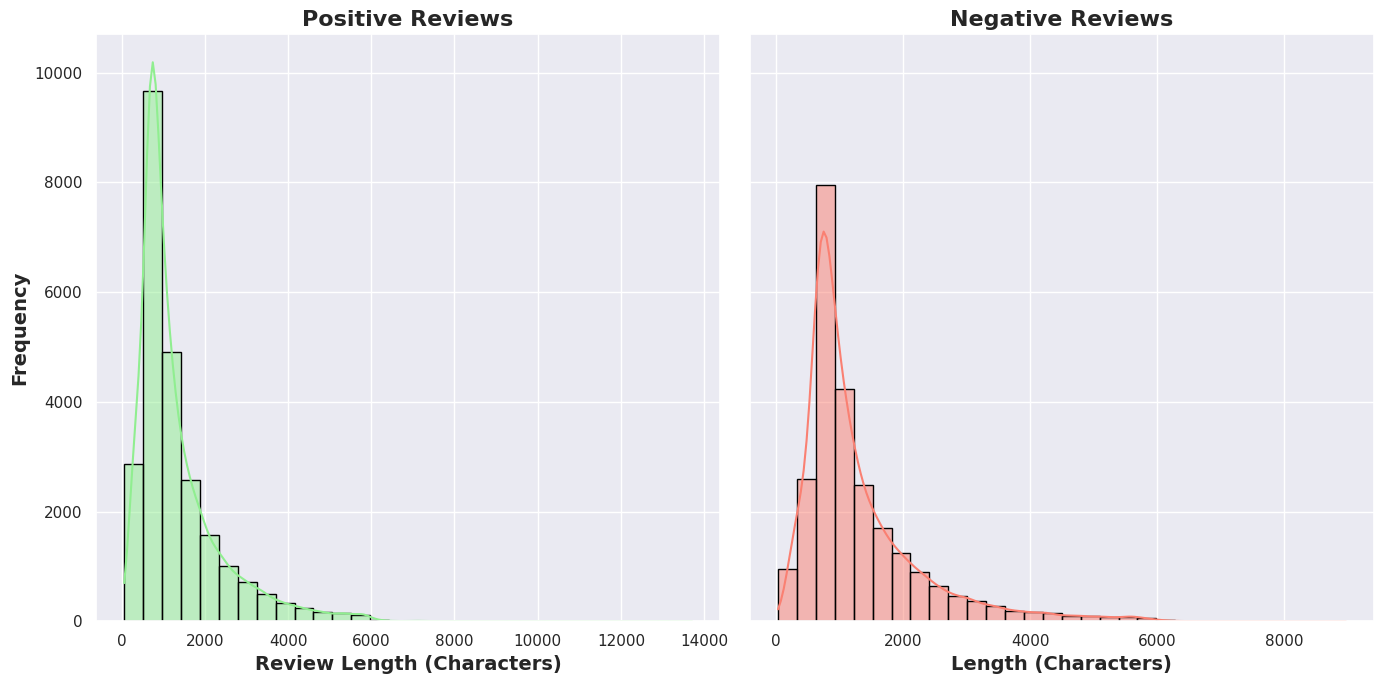

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(0.7,0.5))
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(14,7), sharey=True)

# 긍정적인 리뷰의 히스토그램
sns.histplot(
    x=data[data['sentiment'] == 'positive']['review'].str.len(),
    color='lightgreen',
    bins=30,
    edgecolor='black',
    kde=True,  # 밀도 추정선을 추가
    ax=axs[0]
)

axs[0].set_title("Positive Reviews", fontsize=16, fontweight='bold')
axs[0].set_xlabel("Review Length (Characters)", fontsize=14, fontweight='bold')
axs[0].set_ylabel("Frequency", fontsize=14, fontweight='bold')

# 부정적인 리뷰의 히스토그램
sns.histplot(
    x=data[data['sentiment'] == 'negative']['review'].str.len(),
    color='salmon',
    bins=30,
    edgecolor='black',
    kde=True,  # 밀도 추정선을 추가
    ax=axs[1]
)

axs[1].set_title("Negative Reviews", fontsize=16, fontweight='bold')
axs[1].set_xlabel("Length (Characters)", fontsize=14, fontweight='bold')
axs[1].set_ylabel("Frequency", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

전처리 시작

In [ ]:
# 리뷰를 소문자로 변환
data['review'] = data['review'].str.lower()

data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
## 어퍼스트로피 풀어주기

import re

change = {
    r"\'m": " am",
    r"\'s": " is",
    r"n\'t": " not",
    r"\'re": " are",
    r"\'ve": " have",
    r"\'ll": " will",
    r"\'d": " had"

}

#text 컬럼에서 대체 작업 수행
def replace_contractions(text):
    for pattern, replacement in change.items():
        text = re.sub(pattern, replacement, text)
    return text

    # 리뷰에 적용
data['review'] = data['review'].apply(replace_contractions)

data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei is ""love in the time of money"" i...",positive


In [ ]:
data['review'].iloc[4005]

'this film captured my heart from the very beginning, when hearing quincy jones\' first notes or seeing the wonderful color of purple of the flowers in the meadows. this is truly a film to cry and die for...! the whole cast gives the best performance in a film i have seen in years and spielberg has really outdone himself! whoppi goldberg, margaret avery, oprah winfrey(oh lord!), danny glover, and the others, all give us their best and you can feel it - almost touch it! goldberg is celie, she gives her that insecurity and feeling of inferiority that is needed for the character, and we grow with her, we grow strong together with her, throughout the movie, and we triumph with her. margaret avery is wonderful as shug avery, even when she is at her most arrogant, and shows us that "sinners", indeed, "have souls too". the always sympathetic, charming danny glover makes a marvellous job at making people hate him and the magnificent music of(i had say sir)quincy jones adds even more beauty to 

In [ ]:
from bs4 import BeautifulSoup

# BeautifulSoup을 사용하여 HTML 태그 제거
#HTML 태그란 웹 페이지의 구조를 정의하고 내용을 표시하는 데 사용되는 마크업 언어의 요소
#보통 <>로 이루어져 있음

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
## text에서 대괄호 [] 사이에 있는 모든 텍스트를 제거
def remove_between_square_and_parentheses(text):
    # 대괄호 [] 안의 텍스트 제거
    text = re.sub(r'\[[^\]]*\]', '', text)
    # 소괄호 () 안의 텍스트 제거
    text = re.sub(r'\([^)]*\)', '', text)
    return text


#Removing the noisy text
## 텍스트에서 HTML 태그와 대괄호 안의 노이즈 텍스트를 제거
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_and_parentheses(text)
    return text

#Apply function on review column
## 각 리뷰에서 HTML 태그와 대괄호 안의 노이즈 텍스트를 제거
data['review']=data['review'].apply(denoise_text)

data.head()
#결론 html 태그 제거, 소괄호, 대괄호 안에 있는 텍스트 제거
#노이즈 텍스트 방법이 URL 제거, 이메일 주소 제거, 이모지 제거, 특수 문자 제거, 여러 공백 처리가 있는 것임

<ipython-input-7-bbb662afaa44>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei is ""love in the time of money"" i...",positive


In [ ]:
data['review'].iloc[4005]

'this film captured my heart from the very beginning, when hearing quincy jones\' first notes or seeing the wonderful color of purple of the flowers in the meadows. this is truly a film to cry and die for...! the whole cast gives the best performance in a film i have seen in years and spielberg has really outdone himself! whoppi goldberg, margaret avery, oprah winfrey, danny glover, and the others, all give us their best and you can feel it - almost touch it! goldberg is celie, she gives her that insecurity and feeling of inferiority that is needed for the character, and we grow with her, we grow strong together with her, throughout the movie, and we triumph with her. margaret avery is wonderful as shug avery, even when she is at her most arrogant, and shows us that "sinners", indeed, "have souls too". the always sympathetic, charming danny glover makes a marvellous job at making people hate him and the magnificent music ofquincy jones adds even more beauty to this splendid film! the p

In [ ]:
# 영문 알파벳과 공백을 제외한 모든 문자를 제거
data['review'] = data['review'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter mattei is love in the time of money is ...,positive


In [ ]:
## 줄임말 풀어주기

chat_words = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
# 줄임말이 포함된 리뷰를 찾는 함수
def contains_abbreviation(text):
    words = re.findall(r'\b\w+\b|[^\w\s]', text)
    for w in words:
        if w.lower() in chat_words:
            return True
    return False

# 줄임말이 포함된 리뷰 필터링
abbreviations_in_reviews = data[data['review'].apply(contains_abbreviation)]

# 결과 출력
print(abbreviations_in_reviews)

                                                  review sentiment
4      petter mattei is love in the time of money is ...  positive
12     so im not a big fan of boll is work but then a...  negative
18     i remember this filmit was the first film i ha...  positive
34     i watched this film not really expecting much ...  negative
39     after sitting through this pile of dung my hus...  negative
...                                                  ...       ...
49951  scientists at a remote lab experiment on  and ...  negative
49952  if you played spiderman on the ps version then...  positive
49955  i have not seen this movie but i must having r...  positive
49959  my thoughts on the movie it was not good not g...  negative
49968  i must say as a girl with a cowboy of my owni ...  positive

[5932 rows x 2 columns]


In [ ]:
data['review'].iloc[4]

'petter mattei is love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzler is play about the same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitatthe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterthe acti

In [ ]:
import re

def chat_conversion(text):
    new_text = []
    # 단어와 구두점을 분리하는 정규식
    words = re.findall(r'\b\w+\b|[^\w\s]', text)

    for w in words:
        lower_w = w.lower()  # 소문자로 변환하여 딕셔너리에서 찾음
        if lower_w in chat_words:
            new_text.append(chat_words[lower_w])
        else:
            new_text.append(w)

    return " ".join(new_text)

data['review'] = data['review'].apply(chat_conversion)

data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter mattei is love in the time of money is ...,positive


In [ ]:
data['review'].iloc[4]

'petter mattei is love in the time of money is a visually stunning film to watch mister mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzler is play about the same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitatthe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterthe 

In [ ]:
## 토큰화

import nltk
from nltk.tokenize import word_tokenize

# punkt 토크나이저 모델 다운로드
nltk.download('punkt')

def tokenize_text(text):
    # 텍스트를 단어 단위로 토큰화
    tokens = word_tokenize(text)
    return tokens

# 정제된 텍스트에 대해 토큰화 적용
data['review'] = data['review'].apply(tokenize_text)

# 변환된 데이터프레임의 상위 5개 행을 표시
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, the, filmin...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, there, is, a, family, where, a, li...",negative
4,"[petter, mattei, is, love, in, the, time, of, ...",positive


In [ ]:
## 불용어 제거

import nltk

from nltk.corpus import stopwords

# stopwords 데이터 다운로드
nltk.download('stopwords')

# 불용어 집합 정의
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    # 불용어를 토큰 리스트에서 제거
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# 토큰화된 텍스트에서 불용어 제거 적용
data['review'] = data['review'].apply(remove_stopwords)

# 변환된 데이터프레임의 상위 5개 행을 표시
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, thinks, zombi...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


임베딩

Word2vec

In [ ]:
from collections import Counter
from nltk import FreqDist
import numpy as np

In [ ]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습
word2vec_model = Word2Vec(sentences=data['review'], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# 학습된 단어 임베딩 벡터 확인
word_embedding = word2vec_model.wv['first']  # 'first' 단어의 벡터
print("Word2Vec embedding for 'example':", word_embedding)

Word2Vec embedding for 'example': [ 2.044377    0.83941746 -1.2781253  -0.10813174  0.2116599   1.4570223
  1.3935494   0.72445744  0.16758889 -1.0670372   0.8613526  -0.9924714
  0.38975978  0.09743825  1.5254627  -0.6815987   1.5274749  -0.8549701
 -2.1391098  -3.5487883  -2.186306    0.43337348  0.88157254  0.22802202
 -0.22546749  1.9119925  -0.2396829  -2.6970103   0.33209652  0.5174696
  1.3688711  -0.9321857   0.5011679  -0.30533832 -1.8005298   1.2846799
 -0.99591756 -1.3651212  -0.77661663 -1.1139909  -2.3461268   1.4666977
  1.6447324   3.6797037   1.565746   -0.2200484   1.3677405  -2.399464
  1.7726343   1.3801744  -1.1352808  -1.662577   -2.1070702   1.547616
  1.4792746   0.9683238   2.1088312  -1.0142889   0.01353436 -1.1524267
 -0.2588423   0.5111478  -0.10529871 -1.4041103  -1.2678683   1.2470224
 -2.896752   -0.9109359  -2.9940248  -0.7634271  -0.97324455  0.7331596
  2.2510374  -1.6644932   1.6149733   0.1997923  -1.4974407   2.6586454
  1.3803753  -2.4199286  -0.415

In [ ]:
## first와 유사한 단어
word2vec_model.wv.most_similar('first')

[('second', 0.7458611726760864),
 ('third', 0.6094214916229248),
 ('fourth', 0.5695340037345886),
 ('historyafter', 0.5556562542915344),
 ('last', 0.5551676750183105),
 ('melrose', 0.5224899649620056),
 ('ogar', 0.5218917727470398),
 ('rd', 0.5185407996177673),
 ('duplicative', 0.5096231698989868),
 ('nd', 0.5054171085357666)]

In [ ]:
# Word2Vec 모델로 각 리뷰를 벡터화하는 함수
def vectorize_reviews(model, reviews):
    vectors = []
    for review in reviews:
        word_vectors = [model.wv[word] for word in review if word in model.wv]
        if word_vectors:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

# Word2Vec 임베딩된 리뷰 데이터를 벡터화
X_word2vec = vectorize_reviews(word2vec_model, data['review'])
y = data['sentiment']  # 타겟 레이블

In [ ]:
## 하이퍼 파라미터 튜닝 없이

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 데이터셋 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# SVM 모델 학습
clf_word2vec_svm = SVC()
clf_word2vec_svm.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred_word2vec_svm = clf_word2vec_svm.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred_word2vec_svm)
print("Word2Vec + SVM Accuracy:", accuracy)

Word2Vec + SVM Accuracy: 0.8636684481193909


In [ ]:
## 하이퍼 파라미터 튜닝 진행

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# SVM 모델의 하이퍼파라미터 그리드 설정
param_dist = {
    'C': np.logspace(-2, 2, 5),  # 0.01부터 100까지의 범위를 로그 스케일로 5개만 시도
    'gamma': np.logspace(-3, 1, 5),  # 0.001부터 10까지의 범위를 로그 스케일로 5개만 시도
    'kernel': ['linear', 'rbf']
}

# RandomizedSearchCV로 하이퍼파라미터 튜닝, 10번의 랜덤 시도
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, refit=True, verbose=2, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델로 테스트 데이터 예측
y_pred_word2vec_svm = random_search.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred_word2vec_svm)
print("Word2Vec + SVM Accuracy after Hyperparameter Tuning:", accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.5min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.5min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END .....................C=10.0, gamma=10.0, kernel=rbf; total time= 5.3min
[CV] END .....................C=10.0, gamma=10.0, kernel=rbf; total time= 5.2min
[CV] END .....................C=10.0, gamma=10.0, kernel=rbf; total time= 5.2min
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time= 2.3min
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time= 2.3min
[CV] END .................C=10.0, gamma=0.001, kernel=linear; total time= 2.3min
[CV] END .....................C=100.0, gamma=0.1, kernel=rbf; total time= 6.4min
[CV] END .....................C=100.0, gamma=0.1, kernel=rbf; total time= 6.3min
[CV] END .....................C=100.0, gamma=0.1

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # 데이터셋 분할 (학습용 80%, 테스트용 20%)
# X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# # SVM 모델의 하이퍼파라미터 그리드 설정
# param_grid = {
#     'C': [0.1, 1, 10, 100],         # 정규화 파라미터
#     'gamma': [1, 0.1, 0.01, 0.001], # 커널의 gamma 파라미터
#     'kernel': ['linear', 'rbf', 'poly']  # 커널 종류
# }

# # GridSearchCV로 하이퍼파라미터 튜닝
# grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("Best Hyperparameters:", grid_search.best_params_)

# # 최적의 모델로 테스트 데이터 예측
# y_pred_word2vec_svm = grid_search.predict(X_test)

# # 모델 성능 평가
# accuracy = accuracy_score(y_test, y_pred_word2vec_svm)
# print("Word2Vec + SVM Accuracy after Hyperparameter Tuning:", accuracy)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.1min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.0min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.0min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.0min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  59.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.4min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.4min


glove

In [ ]:
import numpy as np
from gensim.models import KeyedVectors

# GloVe 파일을 Word2Vec 포맷으로 변환한 후 로드해야 합니다.
# 아래 코드는 변환된 GloVe 파일을 로드하는 예시입니다.

def load_glove_model(glove_file):
    print("/content/drive/MyDrive/glove")
    # GloVe 파일을 로드하여 Word2Vec 포맷으로 변환합니다.
    word_vectors = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)
    return word_vectors

# GloVe 파일 경로
glove_file = '/content/drive/MyDrive/glove/glove.6B.100d.txt'
glove_model = load_glove_model(glove_file)

# GloVe에서 'first' 단어의 벡터 확인
word_embedding = glove_model['first']
print("GloVe embedding for 'first':", word_embedding)

# 'first'와 유사한 단어 확인
similar_words = glove_model.most_similar('first')
print("Words similar to 'first':", similar_words)

/content/drive/MyDrive/glove
GloVe embedding for 'first': [-0.020102   0.037514   0.35363    0.16576    0.094826   0.087456
  0.79498    0.20762   -0.58127   -0.077115   0.19662   -0.40312
 -0.078157   0.29174    0.16982    0.0039022  0.73646    0.39023
 -0.097257  -0.17307    0.63939   -0.28145    0.11622    0.67527
  0.63166   -0.78246   -0.052301  -0.27931    0.46076    0.12461
 -0.72262    0.73386    0.12163    0.23468    0.037115   0.12662
 -0.56842    0.62871   -0.22405    0.11521   -0.57071    0.18036
  0.42331    0.041353   0.36782    0.26287    0.47149   -0.83604
  0.33438   -0.72676   -0.50733    0.033712   0.3284     0.86322
 -0.45689   -3.1522    -0.53969    0.033392   1.5954     0.7581
 -0.52425    0.61545   -0.26716    0.4432     0.95084   -0.29942
 -0.0040878  0.39697    0.022105  -0.12852   -0.11692    0.1899
 -0.19811   -0.4304    -0.075405   0.43592   -0.62717   -0.25134
 -1.2143    -0.40294    0.51429    0.1677    -0.31839    0.38681
 -1.4578    -0.43424    0.39687  

In [ ]:
## 하이퍼 파라미터 튜닝 없이

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# GloVe 모델에서 리뷰를 벡터화하는 함수
def vectorize_reviews_glove(model, reviews):
    vectors = []
    for review in reviews:
        word_vectors = [model[word] for word in review if word in model]
        if word_vectors:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

# GloVe 임베딩된 리뷰 데이터를 벡터화
X_glove = vectorize_reviews_glove(glove_model, data['review'])
y = data['sentiment']  # 타겟 레이블

# 데이터셋 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42)

# SVM 모델 생성 및 학습
svm_model = SVC(kernel='linear')  # 기본적으로 'linear' 커널 사용
svm_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_glove_svm = svm_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred_glove_svm)
print("GloVe + SVM Accuracy:", accuracy)

GloVe + SVM Accuracy: 0.8011495411918927


In [ ]:
import os

# 변환된 파일을 저장할 디렉토리 경로
output_dir = '/content/drive/MyDrive/glove'

# 디렉토리가 존재하지 않으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

# GloVe 파일 경로 및 변환된 파일 경로
glove_input_file = '/content/drive/MyDrive/glove/glove.6B.100d.txt'
word2vec_output_file = '/content/drive/MyDrive/glove/glove.6B.100d.word2vec.txt'  # 적절한 경로로 수정

# GloVe 파일을 Word2Vec 포맷으로 변환
glove2word2vec(glove_input_file, word2vec_output_file)

<ipython-input-39-5fc81375b2d8>:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [ ]:
## 하이퍼 파라미터 튜닝 진행

import numpy as np
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# 변환된 Word2Vec 파일 로드
glove_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/glove/glove.6B.100d.word2vec.txt', binary=False)

# GloVe 모델에서 리뷰를 벡터화하는 함수
def vectorize_reviews_glove(model, reviews):
    vectors = []
    for review in reviews:
        word_vectors = [model[word] for word in review if word in model]
        if word_vectors:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

# 데이터 로드 (전처리가 완료된 데이터 가정)
# data['review']는 리스트로 된 리뷰, data['sentiment']는 레이블 (0 또는 1)
# 예를 들어, data['review']는 리뷰 텍스트가 토큰화된 리스트 형태

# 데이터 벡터화
X_glove = vectorize_reviews_glove(glove_model, data['review'])
y = data['sentiment']

# 데이터셋 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# 하이퍼파라미터 범위 설정
param_distributions = {
    'C': loguniform(1e-3, 1e3),  # 정규화 매개변수 C 범위 (로그-균등 분포)
    'gamma': loguniform(1e-4, 1e1),  # 커널 계수 gamma 범위 (로그-균등 분포)
    'kernel': ['linear', 'rbf']  # 커널 종류
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, cv=3, n_jobs=-1, random_state=42)

# 랜덤 서치로 SVM 모델 학습
random_search.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# 최적의 모델로 테스트 데이터에 대한 예측
best_model = random_search.best_estimator_
y_pred_glove_svm = best_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred_glove_svm)
print("GloVe + SVM Accuracy:", accuracy)

Best parameters found:  {'C': 47.6591180868084, 'gamma': 0.09643857615941427, 'kernel': 'rbf'}
Best cross-validation score:  0.8134627909781414
GloVe + SVM Accuracy: 0.8177876373903398


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# GloVe 단어 벡터 로드
def load_glove_vectors(glove_file):
    word_vectors = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            word_vectors[word] = vector
    return word_vectors

# GloVe 벡터 파일 경로 (예: 'glove.6B.100d.txt')
glove_file = '/content/drive/MyDrive/glove/glove.6B.100d.txt'
glove_vectors = load_glove_vectors(glove_file)

# 문서 벡터 생성 (단어 벡터의 평균으로 문서 벡터를 생성)
def get_document_vector_glove(words, word_vectors):
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if len(vectors) == 0:
        return np.zeros(100)  # GloVe 벡터 크기에 맞춰 0으로 채운 벡터
    return np.mean(vectors, axis=0)

# 데이터가 문자열로 되어 있는지 확인하고 리스트로 변환
data['review'] = data['review'].astype(str).tolist()

# 문서 벡터 생성
X_glove = np.array([get_document_vector_glove(review.split(), glove_vectors) for review in data['review']])
y = data['sentiment']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42)

# SVM 모델 학습
clf_glove_svm = SVC()
clf_glove_svm.fit(X_train, y_train)

# 모델 평가
y_pred_glove_svm = clf_glove_svm.predict(X_test)
print("GloVe + SVM Accuracy:", accuracy_score(y_test, y_pred_glove_svm))

GloVe + SVM Accuracy: 0.5019663204598165


BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 각 리뷰를 문자열로 변환 (리스트를 평탄화)
data['review'] = [' '.join(review) if isinstance(review, list) else review for review in data['review']]

# CountVectorizer를 사용하여 Bag of Words 생성
vectorizer = CountVectorizer()

# 문서에서 단어 빈도수를 계산하여 BoW 벡터로 변환
bow_matrix = vectorizer.fit_transform(data['review'])

# BoW 벡터의 모양 확인 (문서 수 x 단어 수)
print("Shape of BoW matrix:", bow_matrix.shape)

# 첫 번째 문서의 BoW 벡터 확인
first_review_bow = bow_matrix[0].toarray()
print("BoW vector for the first review:\n", first_review_bow)

# 사용된 단어 목록 확인
vocabulary = vectorizer.get_feature_names_out()
print("Vocabulary:\n", vocabulary)

Shape of BoW matrix: (49582, 196087)
BoW vector for the first review:
 [[0 0 0 ... 0 0 0]]
Vocabulary:
 ['aa' 'aaa' 'aaaaaaaaaaaahhhhhhhhhhhhhh' ... 'zzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzz' 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


사용된 단어가 이상함

In [ ]:
## 하이퍼 파라미터 튜닝 없이

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# CountVectorizer를 사용하여 Bag of Words 생성
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['review'])
y = data['sentiment']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# SVM 모델 학습
clf_bow_svm = SVC()
clf_bow_svm.fit(X_train, y_train)

# 모델 평가
y_pred_bow_svm = clf_bow_svm.predict(X_test)
print("BoW + SVM Accuracy:", accuracy_score(y_test, y_pred_bow_svm))

BoW + SVM Accuracy: 0.8796006856912373


In [ ]:
## 하이퍼 파라미터 튜닝 진행

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform

# 텍스트 데이터를 BoW (Bag of Words) 방식으로 벡터화합니다.
# 특성의 수를 2000으로 제한하여 메모리 사용을 줄입니다.
vectorizer = CountVectorizer(max_features=2000)
X_bow = vectorizer.fit_transform(data['review'])  # BoW 벡터화된 텍스트 데이터 (희소 행렬)
y = data['sentiment']  # 레이블 데이터

# 데이터를 학습용 80%와 테스트용 20%로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# 훈련 데이터의 10%만 사용하여 빠르게 학습합니다.
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# SVM 모델의 하이퍼파라미터 튜닝을 위해 C 값만 검색합니다.
param_distributions = {'C': loguniform(0.1, 100)}  # C 값의 검색 범위

# SVM 모델을 위한 랜덤 서치를 설정합니다.
# n_iter=10은 10번의 무작위 하이퍼파라미터 조합을 시도합니다.
random_search = RandomizedSearchCV(SVC(kernel='linear'), param_distributions, n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2)

# 샘플링된 학습 데이터에 대해 랜덤 서치를 실행하여 최적의 C 값을 찾습니다.
random_search.fit(X_train_sample, y_train_sample)

# 최적의 C 값과 교차 검증 점수를 출력합니다.
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# 최적의 모델로 테스트 데이터를 예측합니다.
best_model = random_search.best_estimator_
y_pred_bow_svm = best_model.predict(X_test)

# 모델의 예측 성능을 정확도로 평가합니다.
accuracy = accuracy_score(y_test, y_pred_bow_svm)
print("BoW + SVM Accuracy:", accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'C': 0.14936568554617632}
Best cross-validation score:  0.8050932929904185
BoW + SVM Accuracy: 0.8107290511243319


In [ ]:
## 하이퍼 파라미터 튜닝 진행

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform

# 텍스트 데이터를 BoW (Bag of Words) 방식으로 벡터화합니다.
# 특성의 수를 2000으로 제한하여 메모리 사용을 줄입니다.
vectorizer = CountVectorizer(max_features=2000)
X_bow = vectorizer.fit_transform(data['review'])  # BoW 벡터화된 텍스트 데이터 (희소 행렬)
y = data['sentiment']  # 레이블 데이터

# 데이터를 학습용 80%와 테스트용 20%로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# 훈련 데이터의 50%만 사용하여 빠르게 학습합니다.
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# SVM 모델의 하이퍼파라미터 튜닝을 위해 C 값만 검색합니다.
param_distributions = {'C': loguniform(0.1, 100)}  # C 값의 검색 범위

# SVM 모델을 위한 랜덤 서치를 설정합니다.
# n_iter=10은 10번의 무작위 하이퍼파라미터 조합을 시도합니다.
random_search = RandomizedSearchCV(SVC(kernel='linear'), param_distributions, n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2)

# 샘플링된 학습 데이터에 대해 랜덤 서치를 실행하여 최적의 C 값을 찾습니다.
random_search.fit(X_train_sample, y_train_sample)

# 최적의 C 값과 교차 검증 점수를 출력합니다.
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# 최적의 모델로 테스트 데이터를 예측합니다.
best_model = random_search.best_estimator_
y_pred_bow_svm = best_model.predict(X_test)

# 모델의 예측 성능을 정확도로 평가합니다.
accuracy = accuracy_score(y_test, y_pred_bow_svm)
print("BoW + SVM Accuracy:", accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform

# 텍스트 데이터를 BoW (Bag of Words) 방식으로 벡터화합니다.
# 특성의 수를 5000으로 제한하여 메모리 사용을 줄입니다.
vectorizer = CountVectorizer(max_features=5000)
X_bow = vectorizer.fit_transform(data['review'])  # BoW 벡터화된 텍스트 데이터 (희소 행렬)
y = data['sentiment']  # 레이블 데이터

# 데이터를 학습용 80%와 테스트용 20%로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# SVM 모델의 하이퍼파라미터 튜닝을 위해 C 값만 검색합니다.
# loguniform 배포를 사용하여 더 넓은 범위에서 C 값을 무작위로 선택합니다.
param_distributions = {'C': loguniform(0.1, 100)}  # C 값의 검색 범위

# SVM 모델을 위한 랜덤 서치를 설정합니다.
# n_iter=10은 10번의 무작위 하이퍼파라미터 조합을 시도합니다.
random_search = RandomizedSearchCV(SVC(kernel='linear'), param_distributions, n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2)

# 전체 학습 데이터로 랜덤 서치를 실행하여 최적의 C 값을 찾습니다.
random_search.fit(X_train, y_train)

# 최적의 C 값과 교차 검증 점수를 출력합니다.
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# 최적의 모델로 테스트 데이터를 예측합니다.
best_model = random_search.best_estimator_
y_pred_bow_svm = best_model.predict(X_test)

# 모델의 예측 성능을 정확도로 평가합니다.
accuracy = accuracy_score(y_test, y_pred_bow_svm)
print("BoW + SVM Accuracy:", accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 